In [93]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from pandas_datareader import data as pdr
import yfinance as yfin
import datetime as dt
from datetime import datetime
import seaborn as sns
from IPython.display import display, HTML
from scipy.stats import pearsonr

pd.set_option('use_inf_as_na', True)

In [94]:
# Extraer datos de la carpeta 'raw'
df_gdp = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\pct_change\gdp.csv',index_col=0, header=0).dropna()
df_inflation = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\pct_change\inflation.csv',index_col=0, header=0).dropna()
df_interest_rate_spread = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\pct_change\interest_rate_spread.csv',index_col=0, header=0).dropna()
df_interest_rates = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\pct_change\interest_rates.csv',index_col=0, header=0).dropna()
df_unemployment = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\pct_change\unemployment.csv',index_col=0, header=0).dropna()
df_usd = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\pct_change\usd.csv',index_col=0, header=0).dropna()
df_market_hist = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\pct_change\market_hist.csv',index_col=0, header=0).dropna()
df_market_rets = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\pct_change\market_rets.csv',index_col=0, header=0).dropna()
df_market_cum = pd.read_csv(r'C:\Users\Joan Oliver\TheBridge-DataScienceBootcamp\EDA\src\data\processed\pct_change\market_cum.csv',index_col=0, header=0).dropna()

In [104]:
alpha=0.05
h0_str = "Los datos siguen una distribución normal"
h1_str = "Los datos NO siguen una distribución normal"

h0 = 0
h1 = 1

hipo_dict = {h0:h0_str,h1:h1_str}
df_ind = df_interest_rates.pct_change().fillna(0)

for ind in df_ind.columns:
    print(f"->{ind}")
    if len(df_ind[ind])<1000:
        print(f"> Tests de normalidad para {ind}")
        stat, p = stats.shapiro(df_ind[ind].dropna())
        print("Shapiro test for {0}: Stat={1}, p-value={2}".format(ind, stat, p))
        # Decisión en función del p-valor y el nivel de significación
        if p < alpha:
            res1 = h1
        else:
            res1 = h0
        print(hipo_dict[res1])
        print("------------")

    stat, p = stats.kstest(df_ind[ind].dropna(), 'norm')
    print("Kolmogorov-Smirnov test for {0}: Stat={1}, p-value={2}".format(ind, stat, p))
    # Decisión en función del p-valor y el nivel de significación
    if p < alpha:
        res2 = h1
    else:
        res2 = h0
    print(hipo_dict[res2])
    print("------------")

    stat, p = stats.normaltest(df_ind[ind].dropna())
    print("D'Agostino-Pearson test for {0}: Stat={1}, p-value={2}".format(ind, stat, p))
    # Decisión en función del p-valor y el nivel de significación
    if p < alpha:
        res3 = h1
    else:
        res3 = h0
    print(hipo_dict[res3])
    print("--------------------------------------------------------------")
    res = sum([res1,res2,res3])/3
    print(res)
    if res > .5:
        res = 1
    else:
        res = 0
    print("\n")
    print(f"Por lo tanto concluimos que {hipo_dict[res]}")
    print("\n")
    print("--------------------------------------------------------------")

->1-Month Treasury Yield
Kolmogorov-Smirnov test for 1-Month Treasury Yield: Stat=0.3176897935029731, p-value=7.588664044925963e-100
Los datos NO siguen una distribución normal
------------
D'Agostino-Pearson test for 1-Month Treasury Yield: Stat=737.5120428077353, p-value=7.100594892218858e-161
Los datos NO siguen una distribución normal
--------------------------------------------------------------
0.6666666666666666


Por lo tanto concluimos que Los datos NO siguen una distribución normal


--------------------------------------------------------------
->3-Month Treasury Yield
Kolmogorov-Smirnov test for 3-Month Treasury Yield: Stat=0.32792693704817766, p-value=1.5911998819422884e-106
Los datos NO siguen una distribución normal
------------
D'Agostino-Pearson test for 3-Month Treasury Yield: Stat=348.9921292166422, p-value=1.6493849473296863e-76
Los datos NO siguen una distribución normal
--------------------------------------------------------------
0.6666666666666666


Por lo tant

In [98]:
for ind in df_ind.columns:
    U, p_valor = stats.mannwhitneyu(df_ind[ind], df_market_rets["SPY"])

print("Estadístico U: ", U)
print("P-valor: ", p_valor)

Estadístico U:  603471.5
P-valor:  2.3856798930777354e-26


In [97]:
import numpy as np
from scipy.stats import anderson

def is_normal(data, significance_level=0.05):
    """
    Determines if a given dataset follows a normal distribution using the Anderson-Darling test.

    Parameters:
        -- data (array-like): The dataset to be analyzed.
        -- significance_level (float): The significance level for the test. Default is 0.05.

    Returns:
        -- bool: True if the dataset follows a normal distribution, False otherwise.
    """
    # Perform Anderson-Darling test
    statistic, critical_values, significance_levels = anderson(data)

    # Compare the statistic with the critical values at given significance level
    for i in range(len(significance_levels)):
        if statistic < critical_values[i]:
            return True if significance_levels[i] >= significance_level else False

    return True if statistic < critical_values[-1] else False


# Example usage
data = np.random.normal(loc=0, scale=1, size=100)  # Generate 100 random samples from a standard normal distribution
is_normal_dist = is_normal(data)  # Check if the generated data follows a normal distribution
print("Is the dataset normally distributed? ", is_normal_dist)

Is the dataset normally distributed?  True


In [107]:
np.array(df_interest_rates["2-Year Treasury Yield"])

array([ 0.        , -0.04603581, -0.01608579, ...,  0.09042553,
       -0.06829268,  0.03664921])

In [126]:
indicators = {"gdp":df_gdp, "inflation":df_inflation, "interest_rate_spread":df_interest_rate_spread, 
              "interest_rates":df_interest_rates, "unemployment":df_unemployment, "usd":df_usd}
stocks = ['SPY','DIA','^IXIC','XLE','XLF','XLU','XLI','XLK','XLV','XLY','XLP','XLB','IYR','GDX']
markets = stocks

In [124]:
df_ind = df_interest_rate_spread["3m10y"].pct_change().fillna(0)

In [235]:
from scipy.stats import ttest_ind
df_ttest = pd.DataFrame(index=["indicator","market","t_statistic", "p_value"])
contador = 0
alpha = 0.05
for indicator, df_ind in indicators.items():
    for market in markets:
        for ind in df_ind.columns:
            # Assume you have two arrays of returns for the 2-year treasury yield and the S&P500
            ind_returns = np.array(df_ind[ind])
            market_returns = np.array(df_market_hist[market].pct_change().fillna(0))

            # Calculate the mean and standard deviation of the returns
            ind_mean = np.mean(ind_returns)
            market_mean = np.mean(market_returns)
            ind_std = np.std(ind_returns)
            market_std = np.std(market_returns)

            # Conduct the t-test
            t_statistic, p_value = ttest_ind(ind_returns, market_returns)

            # Print the results
            print(f'{ind} mean return: ', ind_mean)
            print(f'{market} mean return: ', market_mean)
            print(f'{ind} standard deviation: ', ind_std)
            print(f'{market} standard deviation: ', market_std)
            print(f't-statistic: ', t_statistic)
            print(f'p-value: ', p_value)
            contador += 1
            df_ttest[contador] = pd.Series([ind,market,t_statistic, p_value],index=["indicator","market","t_statistic", "p_value"])


GDP mean return:  0.020514917046451333
SPY mean return:  -0.8215742496869963
GDP standard deviation:  0.02640983851312599
SPY standard deviation:  12.97976832605555
t-statistic:  0.775696078338711
p-value:  0.43795698834948127
Real GDP mean return:  0.008928406312396277
SPY mean return:  -0.8215742496869963
Real GDP standard deviation:  0.016290324019686577
SPY standard deviation:  12.97976832605555
t-statistic:  0.7650231086520665
p-value:  0.4442858650920527
GDP mean return:  0.020514917046451333
DIA mean return:  -1.3633881582133487
GDP standard deviation:  0.02640983851312599
DIA standard deviation:  21.3536060710045
t-statistic:  0.7748808302442834
p-value:  0.43843857849754475
Real GDP mean return:  0.008928406312396277
DIA mean return:  -1.3633881582133487
Real GDP standard deviation:  0.016290324019686577
DIA standard deviation:  21.3536060710045
t-statistic:  0.7683932707040256
p-value:  0.4422818005433178
GDP mean return:  0.020514917046451333
^IXIC mean return:  -2.751339041

C:\Users\Joan Oliver\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


3-Month Treasury Yield mean return:  0.03236005801598235
XLF mean return:  -1.0865558276165839
3-Month Treasury Yield standard deviation:  0.3465725129241382
XLF standard deviation:  6.88760601555862
t-statistic:  5.403155253039568
p-value:  6.751939703178144e-08
2-Year Treasury Yield mean return:  0.0045539461089079735
XLF mean return:  -1.0865558276165839
2-Year Treasury Yield standard deviation:  0.09392095383546625
XLF standard deviation:  6.88760601555862
t-statistic:  5.2699696652066805
p-value:  1.403020089635201e-07
5-Year Treasury Yield mean return:  0.0024131185300159032
XLF mean return:  -1.0865558276165839
5-Year Treasury Yield standard deviation:  0.07128438383489798
XLF standard deviation:  6.88760601555862
t-statistic:  5.259666141934955
p-value:  1.4836415510743485e-07
10-Year Treasury Yield mean return:  0.001190598495443601
XLF mean return:  -1.0865558276165839
10-Year Treasury Yield standard deviation:  0.04991702973381741
XLF standard deviation:  6.88760601555862
t-

In [236]:
df_ttest = df_ttest.T.set_index(["indicator","market"])
for df in indicators.values():
    for ind in df.columns:
        plt.figure(figsize=(15,5))  
        plt.bar(x = df_ttest.loc[ind,"p_value"].sort_values(ascending=True).index,
                height = df_ttest.loc[ind,"p_value"].sort_values(ascending=True))
        plt.hlines(y=alpha, color='r', linestyle='-', xmin=0, xmax=df_ttest.loc[ind,"p_value"].sort_values(ascending=True).index[-1])
        plt.title(ind)

In [232]:
df_ttest

,GDP,Real GDP
1973-10-01,0.000000,0.000000
1974-01-01,0.010106,-0.008598
1974-04-01,0.026051,0.002377
1974-07-01,0.019588,-0.009451
1974-10-01,0.025418,-0.003881
...,...,...
2021-04-01,0.032853,0.017070
2021-07-01,0.021846,0.006567
2021-10-01,0.033915,0.016957
2022-04-01,0.036936,-0.005544


In [231]:
for df_ind in indicators.values():
    for ind in df_ind.columns:
        print(ind)
        plt.figure(figsize=(15,5))
        plt.bar(x = df_ttest.loc[df_ttest[ind],"p_value"].sort_values(ascending=True).index,
                height = df_ttest.loc[df_ttest[ind],"p_value"].sort_values(ascending=True))
        plt.hlines(y=alpha, color='r', linestyle='-', xmin=0, xmax=df_ttest.loc[df_ind[ind],"p_value"].sort_values(ascending=True).index[-1])

GDP


KeyError: 'p_value'

<Figure size 1500x500 with 0 Axes>

In [220]:
df_ttest.index[0]

('GDP', 'SPY')

In [196]:
df_ttest.set_index(["indicator","market"], inplace=True)

In [197]:
df_ttest.loc["GDP","p_value"].sort_values(ascending=True).index

Index(['XLP', 'XLF', 'XLK', 'XLU', 'XLI', 'GDX', 'XLE', 'IYR', 'XLB', 'SPY',
       'DIA', '^IXIC', 'XLV', 'XLY'],
      dtype='object', name='market')

In [234]:
for df in indicators.values():
    for ind in df.columns:
        plt.figure(figsize=(15,5))  
        plt.bar(x = df_ttest.loc[ind,"p_value"].sort_values(ascending=True).index,
                height = df_ttest.loc[ind,"p_value"].sort_values(ascending=True))
        plt.hlines(y=alpha, color='r', linestyle='-', xmin=0, xmax=df_ttest.loc[ind,"p_value"].sort_values(ascending=True).index[-1])

KeyError: 'GDP'

<Figure size 1500x500 with 0 Axes>

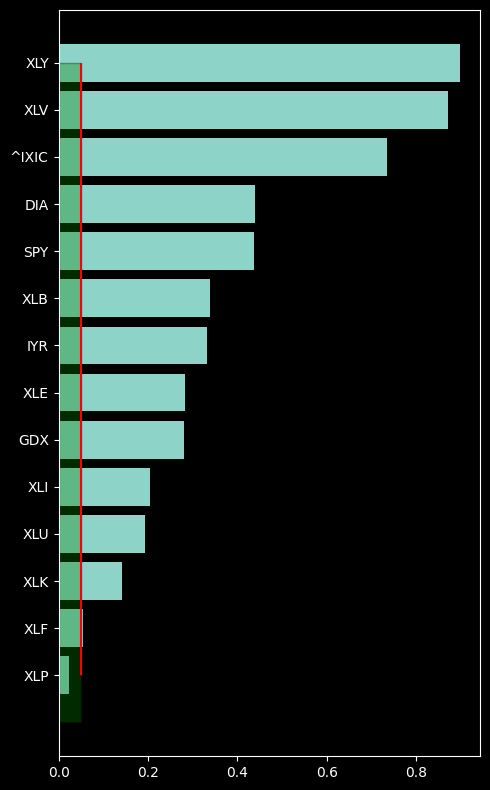

In [270]:
from matplotlib.patches import Rectangle
plt.figure(figsize=(5,8))
plt.barh(y = df_ttest.loc["GDP","p_value"].sort_values(ascending=True).index,
        width= df_ttest.loc["GDP","p_value"].sort_values(ascending=True))
plt.vlines(x=alpha, color='r', linestyle='-', ymin=0, ymax=df_ttest.loc["GDP","p_value"].sort_values(ascending=True).index[-1])
plt.gca().add_patch(Rectangle((0,-1),alpha,14,fc="g",ec="k", alpha=0.33))
plt.tight_layout()